In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
from pathlib import Path
import sys
import glob
from os.path import join
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio 
import matplotlib.pyplot as plt
import rasterio.plot

# Load data

In [144]:
# Get the absolute path to the precal_hazard directory
# Which is two directories above notebooks/exploration/
abs_dir = os.path.abspath(Path(os.getcwd()).parents[1])
# Get raw data directory
fr = join(abs_dir, 'data', 'raw')
# Get interim data directory
fi = join(abs_dir, 'data', 'interim')
# Get processed data directory
fp = join(abs_dir, 'data', 'processed')

# Load depth grids
dg_out_filep = join(fi, 'hazard', 'cst_depth01.tif')
dg = rasterio.open(dg_out_filep)

# Load NSI
nsi_filep = join(fi, 'exposure', 'nsi.gpkg')
nsi = gpd.read_file(nsi_filep)

# Load noaa sovi
sovi_out_filep = join(fp, 'vulnerability', 'social', 'sovi.gpkg')
sovi = gpd.read_file(sovi_out_filep)

# Load noaa sovi
lmi_out_filep = join(fp, 'vulnerability', 'social', 'lmi_bg.gpkg')
lmi = gpd.read_file(lmi_out_filep)

# Load cejst
ce_gc_out_filep = join(fi, 'vulnerability', 'social', 'cejst.gpkg')
ce_gc = gpd.read_file(ce_gc_out_filep)

# Load nj overburdened
ovb_out_filep = join(fi, 'vulnerability', 'social', 'ovb.gpkg')
ovb = gpd.read_file(ovb_out_filep)

# Load census tracts
tracts_filep = join(fp, 'ref', 'tracts.gpkg')
tracts = gpd.read_file(tracts_filep)

# Flood zones
fz_filep = join(fi, 'hazard', 'floodzones.gpkg')
fz = gpd.read_file(fz_filep)

# Max water depth from June 2019
mwd_out_filep = join(fp, 'hazard', 'mwd.tif')
mwd = rasterio.open(mwd_out_filep)

In [4]:
# Subset nsi to res
nsi_res = nsi[nsi['st_damcat'] == 'RES']

# Plot Depth Grids and NSI

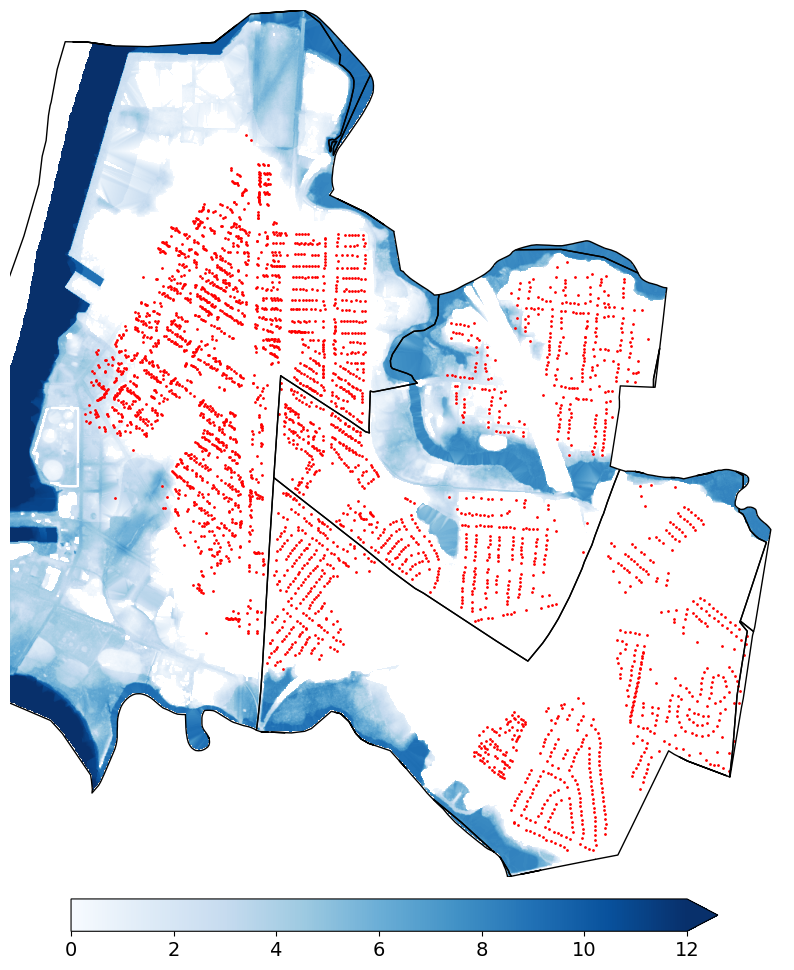

In [71]:
fig, ax = plt.subplots(figsize = (10, 14))
nsi_res.plot(markersize=1, color='red', ax=ax)
tracts.plot(ax=ax, color='none', edgecolor='black', lw=1)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(dg.read(1), 
                         cmap='Blues', 
                         vmin=0, 
                         vmax=12)

rasterio.plot.show(dg, cmap='Blues', ax=ax,
                   vmin=0, vmax=12)
cbar = fig.colorbar(image_hidden, ax=ax,
             orientation='horizontal',
             extend='max',
             fraction=.03,
             pad=.02)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlim([315000, 325000])
# ax.set_title('1% FEMA Coastal Depth Grid (m) w/ NSI, Gloucester City',
#              size=16,
#              pad=12)

ax.axis('off')

# Output figure
fig_dir = '/jumbo/keller-lab/projects/mach/gc_elev/reports/figures'
fig.savefig(join(fig_dir, 'depth_nsi.png'),
            dpi=600,
            bbox_inches='tight')

# Plot different social vuln data

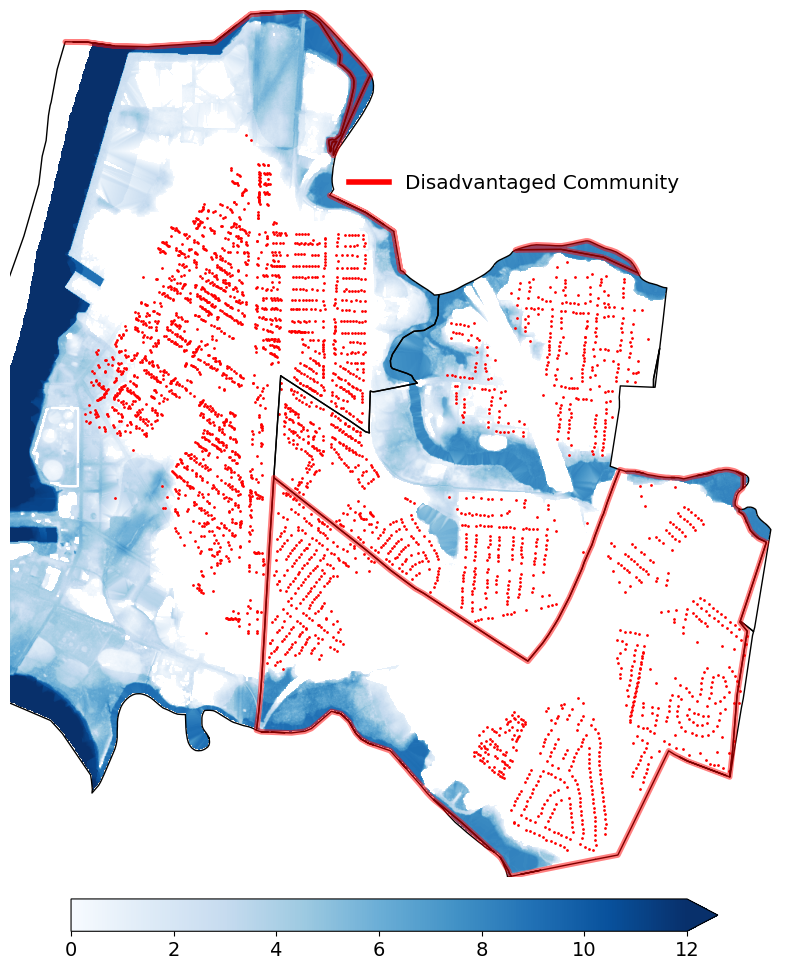

In [108]:
# Plot with cejst
ce_gc['env_jst'] = np.where(ce_gc['SM_C'] == 1,
                                  'Disadvantaged',
                                  'Not Disadvantaged')

fig, ax = plt.subplots(figsize = (10, 14))
nsi_res.plot(markersize=1, color='red', ax=ax)
tracts.plot(ax=ax, color='none', edgecolor='black', lw=1)
ce_gc[ce_gc['env_jst'] == 'Disadvantaged'].plot(ax=ax,
                                                edgecolor='red',
                                                color='none',
                                                alpha=.5,
                                                lw=4)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(dg.read(1), 
                         cmap='Blues', 
                         vmin=0, 
                         vmax=12)

rasterio.plot.show(dg, cmap='Blues', ax=ax,
                   vmin=0, vmax=12)
cbar = fig.colorbar(image_hidden, ax=ax,
             orientation='horizontal',
             extend='max',
             fraction=.03,
             pad=.02)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlim([315000, 325000])
# ax.set_title('1% FEMA Coastal Depth Grid (m) w/ NSI, Gloucester City',
#              size=16,
#              pad=12)

ax.axis('off')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='red', lw=4,
                          label='Disadvantaged Community')]

# Create the figure
ax.legend(handles=legend_elements, loc='center',
          fontsize='x-large',
          frameon=False,
          bbox_to_anchor=(.65, .8))

# Output figure
fig_dir = '/jumbo/keller-lab/projects/mach/gc_elev/reports/figures'
fig.savefig(join(fig_dir, 'depth_nsi_cejst.png'),
            dpi=600,
            bbox_inches='tight')

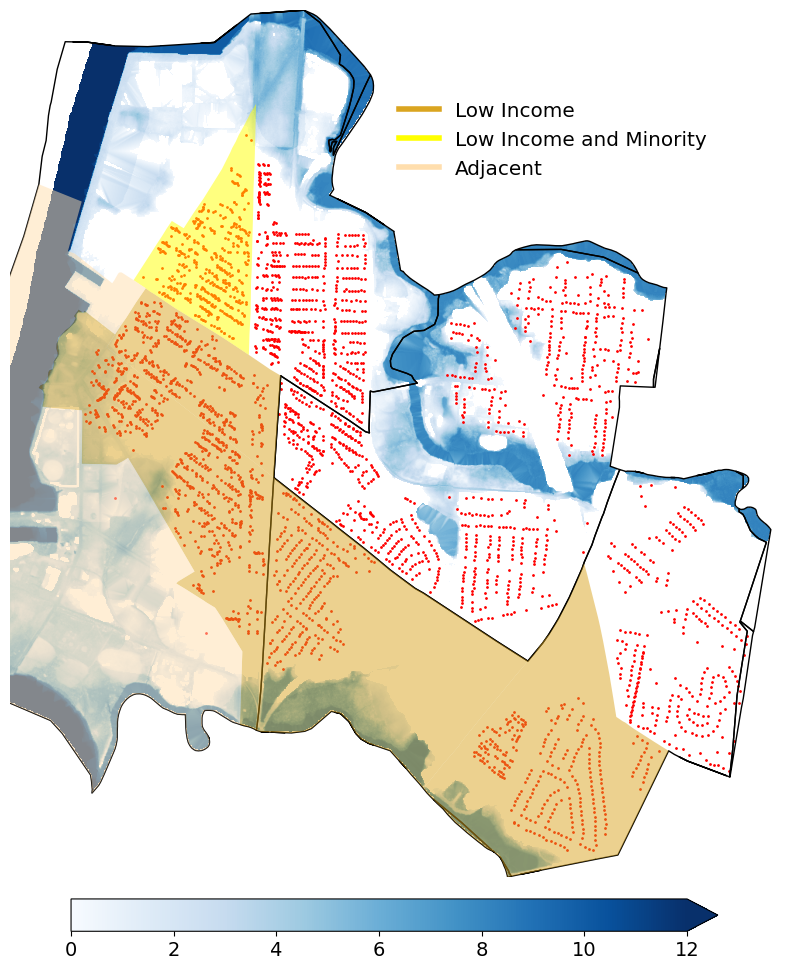

In [138]:
# Plot with nj overburdened
fig, ax = plt.subplots(figsize = (10, 14))
nsi_res.plot(markersize=1, color='red', ax=ax)
tracts.plot(ax=ax, color='none', edgecolor='black', lw=1)
ovb[ovb['ovb_crit'] == 'Low Income'].plot(ax=ax,
                                          color='goldenrod',
                                          alpha=.5)
ovb[ovb['ovb_crit'] == 'Low Income and Minority'].plot(ax=ax,
                                          color='yellow',
                                          alpha=.5)
ovb[ovb['ovb_crit'] == 'Adjacent'].plot(ax=ax,
                                          color='navajowhite',
                                          alpha=.5)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(dg.read(1), 
                         cmap='Blues', 
                         vmin=0, 
                         vmax=12)

rasterio.plot.show(dg, cmap='Blues', ax=ax,
                   vmin=0, vmax=12)
cbar = fig.colorbar(image_hidden, ax=ax,
             orientation='horizontal',
             extend='max',
             fraction=.03,
             pad=.02)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlim([315000, 325000])
# ax.set_title('1% FEMA Coastal Depth Grid (m) w/ NSI, Gloucester City',
#              size=16,
#              pad=12)

ax.axis('off')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='goldenrod', lw=4,
                          label='Low Income'),
                   Line2D([0], [0], color='yellow', lw=4,
                          label='Low Income and Minority'),
                   Line2D([0], [0], color='navajowhite', lw=4,
                          label='Adjacent')]

# Create the figure
ax.legend(handles=legend_elements, loc='center',
          fontsize='x-large',
          frameon=False,
          bbox_to_anchor=(.7, .85))

# Output figure
fig_dir = '/jumbo/keller-lab/projects/mach/gc_elev/reports/figures'
fig.savefig(join(fig_dir, 'depth_nsi_njovb.png'),
            dpi=600,
            bbox_inches='tight')

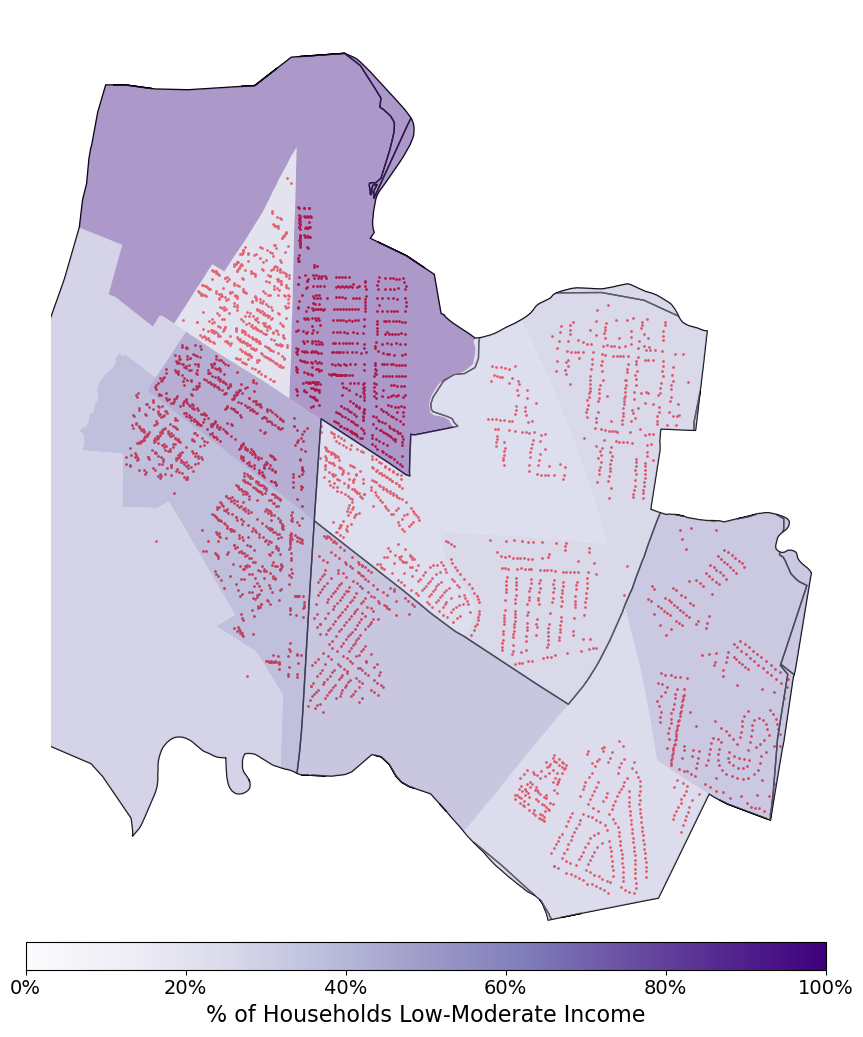

In [137]:
# Plot with low-moderate income
import matplotlib.colors as colors

lmi['pct'] = lmi['Lowmod_pct'].str[:2].astype(float)

fig, ax = plt.subplots(figsize = (10, 14))
nsi_res.plot(markersize=1, color='red', ax=ax)
tracts.plot(ax=ax, color='none', edgecolor='black', lw=1)
lmi.plot(ax=ax, column='pct', cmap='Purples',
         vmin=0, vmax=100,
         # norm=colors.LogNorm(vmin=lmi['pct'].min(), vmax=lmi['pct'].max()),
         legend=False, alpha=.5)

# use imshow so that we have something to map the colorbar to
# image_hidden = ax.imshow(dg.read(1), 
#                          cmap='Blues', 
#                          vmin=0, 
#                          vmax=12)

# rasterio.plot.show(dg, cmap='Blues', ax=ax,
#                    vmin=0, vmax=12)
# cbar = fig.colorbar(image_hidden, ax=ax,
#              orientation='horizontal',
#              extend='max',
#              fraction=.03,
#              pad=.02)
# cbar.ax.tick_params(labelsize=14) 
cax = fig.add_axes([.1, 0.15, 0.8, 0.02])
sm = plt.cm.ScalarMappable(cmap='Purples',
                           norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbr = fig.colorbar(sm, cax=cax, format='%.0f%%', orientation='horizontal')
cbr.ax.tick_params(labelsize=14) 
cbr.set_label("% of Households Low-Moderate Income", size=16)

ax.set_xlim([315000, 325000])
# ax.set_title('1% FEMA Coastal Depth Grid (m) w/ NSI, Gloucester City',
#              size=16,
#              pad=12)

ax.axis('off')

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# legend_elements = [Line2D([0], [0], color='goldenrod', lw=4,
#                           label='Low Income'),
#                    Line2D([0], [0], color='yellow', lw=4,
#                           label='Low Income and Minority'),
#                    Line2D([0], [0], color='navajowhite', lw=4,
#                           label='Adjacent')]

# # Create the figure
# ax.legend(handles=legend_elements, loc='center',
#           fontsize='x-large',
#           frameon=False,
#           bbox_to_anchor=(.7, .85))

# Output figure
fig_dir = '/jumbo/keller-lab/projects/mach/gc_elev/reports/figures'
fig.savefig(join(fig_dir, 'depth_nsi_lmi.png'),
            dpi=600,
            bbox_inches='tight')

# Plot overlay of depth grids and Sara's model

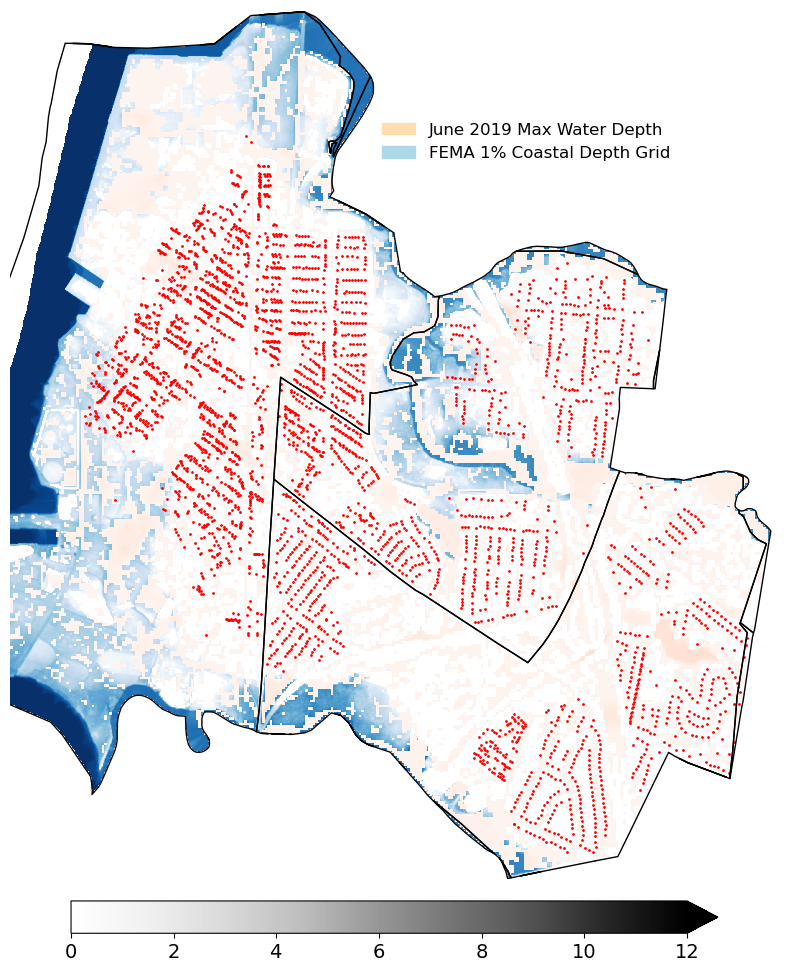

In [154]:
fig, ax = plt.subplots(figsize = (10, 14))
nsi_res.plot(markersize=1, color='red', ax=ax)
tracts.plot(ax=ax, color='none', edgecolor='black', lw=1)
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(dg.read(1), 
                         cmap='Greys', 
                         vmin=0, 
                         vmax=12)

rasterio.plot.show(dg, cmap='Blues', ax=ax,
                   vmin=0, vmax=12)
rasterio.plot.show(mwd, cmap='Reds', ax=ax,
                   vmin=0, vmax=12)
cbar = fig.colorbar(image_hidden, ax=ax,
             orientation='horizontal',
             extend='max',
             fraction=.03,
             pad=.02)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlim([315000, 325000])
# ax.set_title('1% FEMA Coastal Depth Grid (m) w/ NSI, Gloucester City',
#              size=16,
#              pad=12)

ax.axis('off')

legend_elements = [Patch(facecolor='navajowhite', edgecolor='navajowhite',
                         label='June 2019 Max Water Depth'),
                   Patch(facecolor='lightblue', edgecolor='lightblue',
                         label='FEMA 1% Coastal Depth Grid')]

# Create the figure
cax = fig.add_axes([.6, 0.5, 0.2, 0.2])
cax.legend(handles=legend_elements,
           frameon=False,
           fontsize='large')
cax.axis('off')



# Output figure
fig_dir = '/jumbo/keller-lab/projects/mach/gc_elev/reports/figures'
fig.savefig(join(fig_dir, 'depth_june2019.png'),
            dpi=600,
            bbox_inches='tight')